In [1]:
#Studente: Luca Sugamosto, matricola 0324613

In [2]:
#pip install numpy
#pip install pandas
#pip install tensorflow
#pip install scikeras

In [3]:
"L'obiettivo del progetto è addestrare e valutare uno o più modelli di classificazione multiclasse"
# EXTENDED MNIST: versione estesa del dataset MNIST, conentente lettere alfabetiche invece delle cifre.
#                 Viene fornito un file CSV con circa 80000 immagini relative a lettere maiuscole o minuscole.
#                 Nella classificazione non occorre distinguere tra maiuscole e minuscole, quindi le classi da
#                 riconoscere sono 26.
#                 Ogni riga del file contiene l'etichetta della classe corrispondente all'immagine (un intero tra 1 e 26),
#                 seguita da 784 interi compresi tra 0 e 255 che codificano l'intensità di grigio di ogni pixel.

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

#La seguente istruzione permette di generare i grafici all'interno dello stesso file in uso
%matplotlib inline

#Inizializzazione delle dimensioni degli elementi nel grafico
mpl.rc('axes', labelsize = 14)                       
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [4]:
#Fase di inizializzazione sul Data Set:
df = pd.read_csv("emnist-letters.csv")               #Lettura del file contenente i campioni del Data Set
X = df.iloc[:, 1:]                                   #Creazione della tabella delle istanze di ingresso
Y = df.iloc[:, 0]                                    #Creazione del vettore delle etichette associate alle istanze d'ingresso

#Normalizzazione degli attributi dei vettori d'ingresso così da avere valori compresi tra [0,1]
X = X/255

#Con la seguente istruzione si prende la tabella delle istanze di ingresso e si crea un vettore di 88800 elementi,
#dove ogni elemento è una matrice di dimensione 28 x 28 che sta ad indicare una singola instanza di ingresso
X = X.to_numpy().reshape(-1, 28, 28, order = "F")
print("Dimensione della variabile X:", X.shape, "\n")

#Con la seguente istruzione si prende la colonna delle etichette selezionata in precedenza e si trasforma
#in un vettore di dimensione 88800 x 1; in aggiunta il "-1" permette di indicare le 26 classi a partire
#dall'indice 0 e non 1. Quindi Y ha valori al suo interno compresi  tra 0 e 25
Y = Y.to_numpy()-1
print("Dimensione della variabile Y:", Y.shape, "\n")

#Suddivisione delle istanze del Data Set in Training Set e Test Set (rispettivamente 80% e 20%)
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Suddivisione delle istanze del Training Set appena creato in Training Set e Validation Set (rispettivamente 85% e 15%)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_full, Y_train_full, test_size = 0.15, random_state = 42)

print("Numero di campioni contenuti nel Training Set:", X_train.shape[0])
print("Numero di campioni contenuti nel Validation Set:", X_validation.shape[0])
print("Numero di campioni contenuti nel Test Set:", X_test.shape[0])

Dimensione della variabile X: (88800, 28, 28) 

Dimensione della variabile Y: (88800,) 

Numero di campioni contenuti nel Training Set: 60384
Numero di campioni contenuti nel Validation Set: 10656
Numero di campioni contenuti nel Test Set: 17760


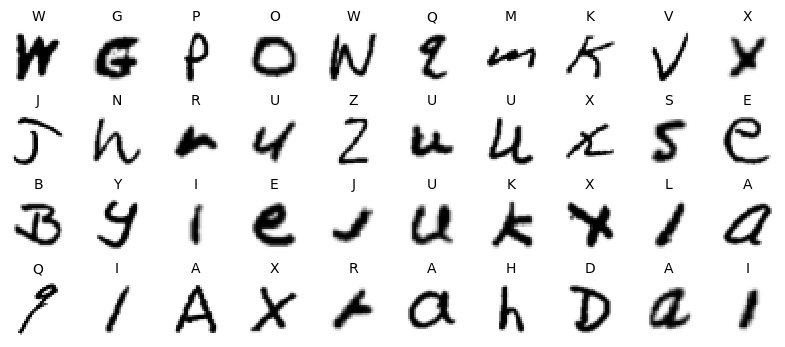

In [5]:
#Stampa a schermo di alcune istanze di ingresso (immagini di lettere scritte a mano)
#da passare successivamente in ingresso alla rete neurale
NN_input = X                                         #Si considera tutto il Data Set
NN_output = Y                                        #Si considera tutto il Data Set

#Sempre per un fatto legato alla stampa a schermo, si inizializza un vettore
#contenente tutte le 26 lettere dell'alfabeto per mostrare quale è la lettera reale
#associata all'immagine stampata
class_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
               "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X",
               "Y", "Z"]

n_rows = 4                                           #Numero di immagini da stampare per riga
n_cols = 10                                          #Numero di immagini da stampare per colonna
plt.figure(figsize = (n_cols * 1, n_rows * 1))       #Dimensione delle singole immagini da stampare
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(NN_input[index], cmap = "binary", interpolation = "nearest")
        plt.axis('off')
        plt.title(class_names[NN_output[index]], fontsize = 10)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)      #Spazio in altezza e larghezza tra le varie immagini
plt.show()

In [6]:
#Fase di creazione/inizializzazione della rete neurale:
#Il modello utilizzato è quello SEQUENZIALE, quindi la rete neurale si compone di strati densi
#(ciò significa che gli strati sono completamente connessi). Ogni strato possiede una propria
#funzione di attivazione ed un certo numero di neuroni scelti dall'utente sulla base di simulazioni 
model = keras.models.Sequential()                              

#1° implementazione possibile per la rete neurale (2 STRATI NASCOSTI)        
#model.add(keras.layers.Flatten(input_shape = [28, 28]))        #Strato d'ingresso con funzione identità
#model.add(keras.layers.Dense(256, activation = "relu"))        #1° strato nascosto con funzione ReLU
#model.add(keras.layers.Dense(128, activation = "relu"))        #2° strato nascosto con funzione ReLU
#model.add(keras.layers.Dense(26, activation = "softmax"))      #Strato d'uscita con funzione Softmax

#2° implementazione possibile per la rete neurale (3 STRATI NASCOSTI)
model.add(keras.layers.Flatten(input_shape = [28, 28]))         #Strato d'ingresso con funzione identità
model.add(keras.layers.Dense(256, activation = "relu"))         #1° strato nascosto con funzione ReLU
model.add(keras.layers.Dense(128, activation = "relu"))         #2° strato nascosto con funzione ReLU
model.add(keras.layers.Dense(64, activation = "relu"))          #3° strato nascosto con funzione ReLU
model.add(keras.layers.Dense(26, activation = "softmax"))       #Strato d'uscita con funzione Softmax

#3° implementazione possibile per la rete neurale (4 STRATI NASCOSTI)
#model.add(keras.layers.Flatten(input_shape = [28, 28]))        #Strato d'ingresso con funzione identità
#model.add(keras.layers.Dense(256, activation = "relu"))        #1° strato nascosto con funzione ReLU
#model.add(keras.layers.Dense(128, activation = "relu"))        #2° strato nascosto con funzione ReLU
#model.add(keras.layers.Dense(64, activation = "relu"))         #3° strato nascosto con funzione ReLU
#model.add(keras.layers.Dense(32, activation = "relu"))         #4° strato nascosto con funzione ReLU
#model.add(keras.layers.Dense(26, activation = "softmax"))      #Strato d'uscita con funzione Softmax

model.summary()                                                #Restituisce la descrizione sommaria della rete neurale
                                                               #appena definita


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 26)                1690      
                                                                 
Total params: 243802 (952.35 KB)
Trainable params: 243802 (952.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
#IL CODICE SCRITTO PRIMA VIENE REPLICATO ALTRE DUE VOLTE PERCHE' SI SIMULA IL COMPORTAMENTO
#DELLO STESSO MODELLO CON TRE ALGORITMI DI OTTIMIZZAZIONE DIVERSI.

#Fase di creazione/inizializzazione della rete neurale:
#Il modello utilizzato è quello SEQUENZIALE, quindi la rete neurale si compone di strati densi
#(ciò significa che gli strati sono completamente connessi). Ogni strato possiede una propria
#funzione di attivazione ed un certo numero di neuroni scelti dall'utente sulla base di simulazioni 
model_2 = keras.models.Sequential()                              

#1° implementazione possibile per la rete neurale (2 STRATI NASCOSTI)        
#model_2.add(keras.layers.Flatten(input_shape = [28, 28]))        #Strato d'ingresso con funzione identità
#model_2.add(keras.layers.Dense(256, activation = "relu"))        #1° strato nascosto con funzione ReLU
#model_2.add(keras.layers.Dense(128, activation = "relu"))        #2° strato nascosto con funzione ReLU
#model_2.add(keras.layers.Dense(26, activation = "softmax"))      #Strato d'uscita con funzione Softmax

#2° implementazione possibile per la rete neurale (3 STRATI NASCOSTI)
model_2.add(keras.layers.Flatten(input_shape = [28, 28]))         #Strato d'ingresso con funzione identità
model_2.add(keras.layers.Dense(256, activation = "relu"))         #1° strato nascosto con funzione ReLU
model_2.add(keras.layers.Dense(128, activation = "relu"))         #2° strato nascosto con funzione ReLU
model_2.add(keras.layers.Dense(64, activation = "relu"))          #3° strato nascosto con funzione ReLU
model_2.add(keras.layers.Dense(26, activation = "softmax"))       #Strato d'uscita con funzione Softmax

#3° implementazione possibile per la rete neurale (4 STRATI NASCOSTI)
#model_2.add(keras.layers.Flatten(input_shape = [28, 28]))        #Strato d'ingresso con funzione identità
#model_2.add(keras.layers.Dense(256, activation = "relu"))        #1° strato nascosto con funzione ReLU
#model_2.add(keras.layers.Dense(128, activation = "relu"))        #2° strato nascosto con funzione ReLU
#model_2.add(keras.layers.Dense(64, activation = "relu"))         #3° strato nascosto con funzione ReLU
#model_2.add(keras.layers.Dense(32, activation = "relu"))         #4° strato nascosto con funzione ReLU
#model_2.add(keras.layers.Dense(26, activation = "softmax"))      #Strato d'uscita con funzione Softmax

model_2.summary()                                                #Restituisce la descrizione sommaria della rete neurale
                                                               #appena definita
#----------------------------------------------------------------------------------------------------------------------------  
model_3 = keras.models.Sequential()                              

#1° implementazione possibile per la rete neurale (2 STRATI NASCOSTI)        
#model_3.add(keras.layers.Flatten(input_shape = [28, 28]))        #Strato d'ingresso con funzione identità
#model_3.add(keras.layers.Dense(256, activation = "relu"))        #1° strato nascosto con funzione ReLU
#model_3.add(keras.layers.Dense(128, activation = "relu"))        #2° strato nascosto con funzione ReLU
#model_3.add(keras.layers.Dense(26, activation = "softmax"))      #Strato d'uscita con funzione Softmax

#2° implementazione possibile per la rete neurale (3 STRATI NASCOSTI)
model_3.add(keras.layers.Flatten(input_shape = [28, 28]))         #Strato d'ingresso con funzione identità
model_3.add(keras.layers.Dense(256, activation = "relu"))         #1° strato nascosto con funzione ReLU
model_3.add(keras.layers.Dense(128, activation = "relu"))         #2° strato nascosto con funzione ReLU
model_3.add(keras.layers.Dense(64, activation = "relu"))          #3° strato nascosto con funzione ReLU
model_3.add(keras.layers.Dense(26, activation = "softmax"))       #Strato d'uscita con funzione Softmax

#3° implementazione possibile per la rete neurale (4 STRATI NASCOSTI)
#model_3.add(keras.layers.Flatten(input_shape = [28, 28]))        #Strato d'ingresso con funzione identità
#model_3.add(keras.layers.Dense(256, activation = "relu"))        #1° strato nascosto con funzione ReLU
#model_3.add(keras.layers.Dense(128, activation = "relu"))        #2° strato nascosto con funzione ReLU
#model_3.add(keras.layers.Dense(64, activation = "relu"))         #3° strato nascosto con funzione ReLU
#model_3.add(keras.layers.Dense(32, activation = "relu"))         #4° strato nascosto con funzione ReLU
#model_3.add(keras.layers.Dense(26, activation = "softmax"))      #Strato d'uscita con funzione Softmax

model_3.summary()                                                #Restituisce la descrizione sommaria della rete neurale
                                                               #appena definita

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 26)                1690      
                                                                 
Total params: 243802 (952.35 KB)
Trainable params: 243802 (952.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequen

In tutte e tre le seguenti parti di codice in cui sono inizializzate le caratteristiche
funzionali e gli algoritmi che dovranno usare i modelli, non vi è nessun accenno al valore
che il LEARNING RATE possiede, questo significa che è settato di default al valore 0.001.

In [8]:
#Fase di ottimizzazione dei parametri (w, b) della rete neurale per mezzo delll'algoritmo SGD:
"L'ottimizzazione è uno dei due argomenti necessari, insieme all'addestramento, per la compilazione di un modello"
model.compile(                                               #Settaggio delle funzioni/algoritmi che deve usare "model"
    loss = "sparse_categorical_crossentropy",                #Funzione di perdita per il calcolo dell'errore
    optimizer = keras.optimizers.SGD(),                      #Algoritmo di ottimizzazione dei parametri
    metrics = ["accuracy"]                                   #Funzione per valutare le prestazioni del modello
)

In [9]:
#Fase di ottimizzazione dei parametri (w, b) della rete neurale per mezzo dell'algoritmo RMSprop:
"L'ottimizzazione è uno dei due argomenti necessari, insieme all'addestramento, per la compilazione di un modello"
model_2.compile(                                             #Settaggio delle funzioni/algoritmi che deve usare "model_2"
    loss = "sparse_categorical_crossentropy",                #Funzione di perdita per il calcolo dell'errore
    optimizer = keras.optimizers.RMSprop(),                  #Algoritmo di ottimizzazione dei parametri
    metrics = ["accuracy"]                                   #Funzione per valutare le prestazioni del modello
)

In [10]:
#Fase di ottimizzazione dei parametri (w, b) della rete neurale per mezzo dell'algoritmo Adam:
"L'ottimizzazione è uno dei due argomenti necessari, insieme all'addestramento, per la compilazione di un modello"
model_3.compile(                                             #Settaggio delle funzioni/algoritmi che deve usare "model_3"
    loss = "sparse_categorical_crossentropy",                #Funzione di perdita per il calcolo dell'errore
    optimizer = keras.optimizers.Adam(),                     #Algoritmo di ottimizzazione dei parametri
    metrics = ["accuracy"]                                   #Funzione per valutare le prestazioni del modello
)

In [11]:
    #Fase di addestramento della rete neurale e dei rispettivi parametri (w, b):
    "L'addestramento è la fase più importante perchè consiste nel definire i valori ottimi dei parametri (w, b)"
    print("-----Fit model on Training Set-----\n")
    history = model.fit(                                       #Tale funzione "fit" viene assegnata alla variabile "history"
        X_train,                                               #così da graficarne successivamente l'andamento
        Y_train,
        batch_size = 32,                                       #Numero di campioni contenuti in ogni mini-batch
        epochs = 30,                                           #Numero di volte che tutti i campioni devono essere analizzati

        validation_data = (X_validation, Y_validation),        #Si passa il Validation Set per monitorare il valore 
                                                               #di perdita e di accuratezza su questo secondo insieme di dati
                                                               #alla fine di ogni epoca esaminata
        callbacks = [keras.callbacks.EarlyStopping(patience = 20)]
        #Utilizzo della tecnica di "Early Stopping" per terminare in anticipo l'addestramento,
        #nel caso in cui si verifica il fenomeno di sovra-adattamento e quindi di poca generalizzazione
        #Il parametro "patience" indica dopo quante epoche in cui il "val_loss" aumenta bisogna arrestare l'algoritmo
    )

-----Fit model on Training Set-----

Epoch 1/30


1887/1887 [==============================] - 11s 5ms/step - loss: 1.7752 - accuracy: 0.5036 - val_loss: 1.1429 - val_accuracy: 0.6670
Epoch 2/30
1887/1887 [==============================] - 7s 4ms/step - loss: 0.9621 - accuracy: 0.7166 - val_loss: 0.8437 - val_accuracy: 0.7474
Epoch 3/30
1887/1887 [==============================] - 7s 4ms/step - loss: 0.7483 - accuracy: 0.7786 - val_loss: 0.6891 - val_accuracy: 0.7956
Epoch 4/30
1887/1887 [==============================] - 7s 4ms/step - loss: 0.6225 - accuracy: 0.8134 - val_loss: 0.5952 - val_accuracy: 0.8244
Epoch 5/30
1887/1887 [==============================] - 8s 4ms/step - loss: 0.5392 - accuracy: 0.8359 - val_loss: 0.5393 - val_accuracy: 0.8399
Epoch 6/30
1887/1887 [==============================] - 7s 4ms/step - loss: 0.4798 - accuracy: 0.8526 - val_loss: 0.4951 - val_accuracy: 0.8524
Epoch 7/30
1887/1887 [==============================] - 8s 4ms/step - loss: 0.4361 - accuracy: 0

In [12]:
#Fase di addestramento della rete neurale e dei rispettivi parametri (w, b):
"L'addestramento è la fase più importante perchè consiste nel definire i valori ottimi dei parametri (w, b)"
print("-----Fit model on Training Set-----\n")
history_2 = model_2.fit(                                   #Tale funzione "fit" viene assegnata alla variabile "history"
    X_train,                                               #così da graficarne successivamente l'andamento
    Y_train,
    batch_size = 32,                                       #Numero di campioni contenuti in ogni mini-batch
    epochs = 30,                                           #Numero di volte che tutti i campioni devono essere analizzati
    
    validation_data = (X_validation, Y_validation),        #Si passa il Validation Set per monitorare il valore 
                                                           #di perdita e di accuratezza su questo secondo insieme di dati
                                                           #alla fine di ogni epoca esaminata
    callbacks = [keras.callbacks.EarlyStopping(patience = 20)]
    #Utilizzo della tecnica di "Early Stopping" per terminare in anticipo l'addestramento,
    #nel caso in cui si verifica il fenomeno di sovra-adattamento e quindi di poca generalizzazione
    #Il parametro "patience" indica dopo quante epoche in cui il "val_loss" aumenta bisogna arrestare l'algoritmo
)

-----Fit model on Training Set-----

Epoch 1/30
1887/1887 [==============================] - 11s 5ms/step - loss: 0.8001 - accuracy: 0.7568 - val_loss: 0.5310 - val_accuracy: 0.8377
Epoch 2/30
1887/1887 [==============================] - 10s 5ms/step - loss: 0.4209 - accuracy: 0.8671 - val_loss: 0.4074 - val_accuracy: 0.8774
Epoch 3/30
1887/1887 [==============================] - 9s 5ms/step - loss: 0.3431 - accuracy: 0.8888 - val_loss: 0.4154 - val_accuracy: 0.8768
Epoch 4/30
1887/1887 [==============================] - 10s 5ms/step - loss: 0.2986 - accuracy: 0.9031 - val_loss: 0.4006 - val_accuracy: 0.8814
Epoch 5/30
1887/1887 [==============================] - 9s 5ms/step - loss: 0.2742 - accuracy: 0.9099 - val_loss: 0.4125 - val_accuracy: 0.8879
Epoch 6/30
1887/1887 [==============================] - 10s 5ms/step - loss: 0.2560 - accuracy: 0.9158 - val_loss: 0.4114 - val_accuracy: 0.8871
Epoch 7/30
1887/1887 [==============================] - 10s 5ms/step - loss: 0.2409 - accuracy:

In [13]:
#Fase di addestramento della rete neurale e dei rispettivi parametri (w, b):
"L'addestramento è la fase più importante perchè consiste nel definire i valori ottimi dei parametri (w, b)"
print("-----Fit model on Training Set-----\n")
history_3 = model_3.fit(                                   #Tale funzione "fit" viene assegnata alla variabile "history"
    X_train,                                               #così da graficarne successivamente l'andamento
    Y_train,
    batch_size = 32,                                       #Numero di campioni contenuti in ogni mini-batch
    epochs = 30,                                           #Numero di volte che tutti i campioni devono essere analizzati
    
    validation_data = (X_validation, Y_validation),        #Si passa il Validation Set per monitorare il valore 
                                                           #di perdita e di accuratezza su questo secondo insieme di dati
                                                           #alla fine di ogni epoca esaminata
    callbacks = [keras.callbacks.EarlyStopping(patience = 20)]
    #Utilizzo della tecnica di "Early Stopping" per terminare in anticipo l'addestramento,
    #nel caso in cui si verifica il fenomeno di sovra-adattamento e quindi di poca generalizzazione
    #Il parametro "patience" indica dopo quante epoche in cui il "val_loss" aumenta bisogna arrestare l'algoritmo
)

-----Fit model on Training Set-----

Epoch 1/30
1887/1887 [==============================] - 11s 5ms/step - loss: 0.7974 - accuracy: 0.7588 - val_loss: 0.4683 - val_accuracy: 0.8523
Epoch 2/30
1887/1887 [==============================] - 11s 6ms/step - loss: 0.4143 - accuracy: 0.8661 - val_loss: 0.4153 - val_accuracy: 0.8657
Epoch 3/30
1887/1887 [==============================] - 10s 5ms/step - loss: 0.3299 - accuracy: 0.8906 - val_loss: 0.3578 - val_accuracy: 0.8867
Epoch 4/30
1887/1887 [==============================] - 10s 5ms/step - loss: 0.2782 - accuracy: 0.9046 - val_loss: 0.3668 - val_accuracy: 0.8865
Epoch 5/30
1887/1887 [==============================] - 11s 6ms/step - loss: 0.2445 - accuracy: 0.9145 - val_loss: 0.3456 - val_accuracy: 0.8953
Epoch 6/30
1887/1887 [==============================] - 11s 6ms/step - loss: 0.2160 - accuracy: 0.9226 - val_loss: 0.3532 - val_accuracy: 0.8927
Epoch 7/30
1887/1887 [==============================] - 11s 6ms/step - loss: 0.1918 - accurac

1° grafico associato al modello "model", addestrato con algoritmo di ottimizzazione "SGD":

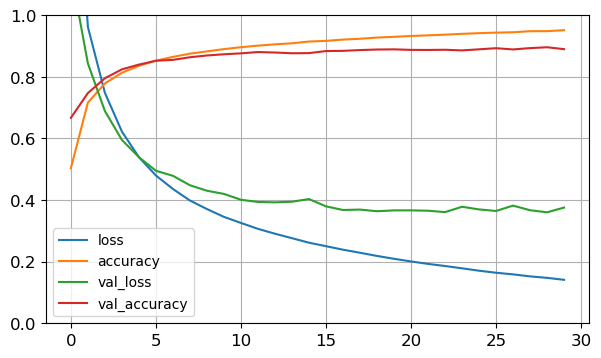

In [14]:
#Rappresentazione grafica dei risultati ottenuti in termini
#di perdita ed accuratezza durante la fase di addestramento
pd.DataFrame(history.history).plot(figsize = (7, 4))           #Dimensione del grafico 2D
plt.grid(True)                                                 #Presenza della griglia del grafico 2D
plt.gca().set_ylim(0, 1)                                       #Range dai valori assunti dagli assi
plt.show()

2° grafico associato al modello "model_2", addestrato con algoritmo di ottimizzazione "RMSProp":

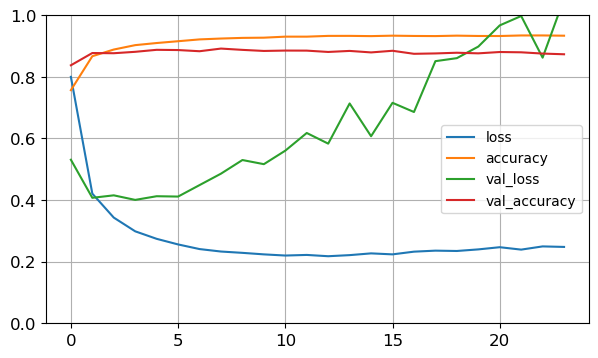

In [15]:
#Rappresentazione grafica dei risultati ottenuti in termini
#di perdita ed accuratezza durante la fase di addestramento
pd.DataFrame(history_2.history).plot(figsize = (7, 4))         #Dimensione del grafico 2D
plt.grid(True)                                                 #Presenza della griglia del grafico 2D
plt.gca().set_ylim(0, 1)                                       #Range dai valori assunti dagli assi
plt.show()

3° grafico associato al modello "model_3", addestrato con algoritmo di ottimizzazione "Adam":

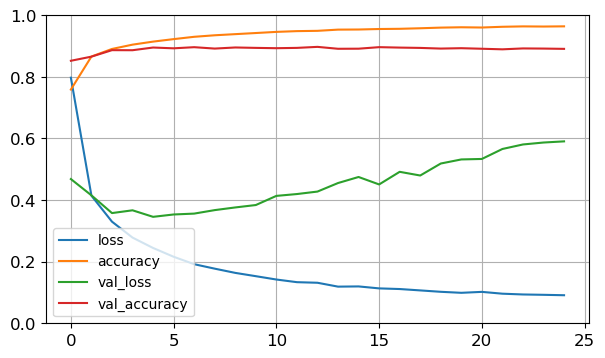

In [16]:
#Rappresentazione grafica dei risultati ottenuti in termini
#di perdita ed accuratezza durante la fase di addestramento
pd.DataFrame(history_3.history).plot(figsize = (7, 4))         #Dimensione del grafico 2D
plt.grid(True)                                                 #Presenza della griglia del grafico 2D
plt.gca().set_ylim(0, 1)                                       #Range dai valori assunti dagli assi
plt.show()

In [17]:
#Verifica della bontà dei parametri (w, b) ottenuti utilizzando come 
#algoritmo di ottimizzazione il SGD.
#Si utilizza in questo caso lo stesso modello con in ingresso il Test Set
print("-----Evaluate on Test Set-----\n")
print("Valori di perdita ed accuratezza sul Test Set (1):")
results = model.evaluate(X_test, Y_test, batch_size = 32)      #Con questa funzione si utilizza la rete neurale già creata
                                                               #con i parametri addestrati, per calcolare accuratezza e
                                                               #perdita sul Test Set

-----Evaluate on Test Set-----

Valori di perdita ed accuratezza sul Test Set (1):
555/555 [==============================] - 2s 3ms/step - loss: 0.3834 - accuracy: 0.8937


In [18]:
#Verifica della bontà dei parametri (w, b) ottenuti utilizzando come 
#algoritmo di ottimizzazione il RMSProp.
#Si utilizza in questo caso lo stesso modello con in ingresso il Test Set
print("-----Evaluate on Test Set-----\n")
print("Valori di perdita ed accuratezza sul Test Set (2):")
results_2 = model_2.evaluate(X_test, Y_test, batch_size = 32)  #Con questa funzione si utilizza la rete neurale già creata
                                                               #con i parametri addestrati, per calcolare accuratezza e
                                                               #perdita sul Test Set

-----Evaluate on Test Set-----

Valori di perdita ed accuratezza sul Test Set (2):
555/555 [==============================] - 1s 2ms/step - loss: 1.0880 - accuracy: 0.8761


In [19]:
#Verifica della bontà dei parametri (w, b) ottenuti utilizzando come 
#algoritmo di ottimizzazione il Adam.
#Si utilizza in questo caso lo stesso modello con in ingresso il Test Set
print("-----Evaluate on Test Set-----\n")
print("Valori di perdita ed accuratezza sul Test Set (3):")
results_3 = model_3.evaluate(X_test, Y_test, batch_size = 32)  #Con questa funzione si utilizza la rete neurale già creata
                                                               #con i parametri addestrati, per calcolare accuratezza e
                                                               #perdita sul Test Set

-----Evaluate on Test Set-----

Valori di perdita ed accuratezza sul Test Set (3):
555/555 [==============================] - 1s 2ms/step - loss: 0.5714 - accuracy: 0.8974
